<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk24_ss52_Stocastic_gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔴 **Problems with Batch Gradient Descent (BGD)**

### 1. **Slow Convergence:**
- In **Batch Gradient Descent (BGD)**, the algorithm updates the model parameters (weights and intercept) only after processing the entire dataset in each epoch.
- Even if the model is heading in the right direction, it won’t update until the entire batch is processed.
- This makes convergence (reaching the minimum loss) very slow, especially for large datasets.

### 2. **Memory Consumption:**
- BGD processes the entire dataset at once, which requires loading all the data into memory.
- For large datasets, this can cause significant memory issues, potentially crashing systems with limited resources.

### 3. **Getting Stuck in Local Minima (for Non-Convex Functions):**
- If the cost function is non-convex (has multiple local minima), BGD might get stuck in a local minimum or take a long time to escape.
- Because BGD uses the average gradient over the entire dataset, it lacks the randomness needed to "jump out" of bad local minima.

### 4. **Inefficiency with Redundant Data:**
- In datasets with repeated or very similar data points, BGD can waste computational resources by recalculating similar gradients repeatedly.
- This leads to unnecessary computations and slows down training.

### 5. **No Real-Time Updates:**
- In online learning applications (where new data arrives continuously), BGD is impractical because it can only update after processing the entire dataset.
- It can't adapt to new data in real time, unlike **Stochastic Gradient Descent (SGD)**, which updates parameters after each individual sample.

---

### 🚩 **Summary:**
- **Batch GD is accurate but slow and memory-intensive.**
- **It struggles with large, redundant, or continuously changing datasets.**

# 📘 **Stochastic Gradient Descent (SGD)**

### 🔑 **What is Stochastic Gradient Descent?**  
Stochastic Gradient Descent (SGD) is a variation of the Gradient Descent algorithm where the model parameters are updated **after each individual training example** rather than waiting to process the entire dataset. This makes it faster and more suitable for large datasets, though it introduces some noise in the updates.  

---

### 🧠 **Intuition Behind SGD**  
Imagine you're climbing a mountain (minimizing loss). In **Batch GD**, you calculate the average slope of the entire terrain before taking a step, which is slow but steady. In **SGD**, you take a step after checking only one nearby point — it's quicker, but your path might be zigzagging.  

Despite the noisy updates, SGD can still find the global minimum, and sometimes, the noise helps escape local minima!

---

### 🏎 **How SGD Works (Step by Step):**  
1. **Initialize Parameters:** Start with random weights and bias.  
2. **Pick One Random Sample:** Choose a single random training example.  
3. **Compute Prediction:** Use current parameters to make a prediction for that sample.  
4. **Calculate Loss:** Measure how far the prediction is from the actual value (using a loss function like MSE).  
5. **Compute Gradients:** Calculate the gradient of the loss function with respect to each parameter.  
6. **Update Parameters:** Adjust the parameters using the gradients and a learning rate.  
7. **Repeat:** Iterate through the dataset multiple times (epochs) until convergence.

---

### ⚡ **Mathematical Formulation**  
For a single training sample \((x_i, y_i)\):  
- **Prediction:** \(\hat{y_i} = w \cdot x_i + b\)  
- **Loss (MSE):** \( L = (y_i - \hat{y_i})^2 \)  
- **Gradients:**  
  - \( \frac{\partial L}{\partial w} = -2x_i(y_i - \hat{y_i}) \)  
  - \( \frac{\partial L}{\partial b} = -2(y_i - \hat{y_i}) \)  
- **Update Rules:**  
  - \( w = w - \eta \frac{\partial L}{\partial w} \)  
  - \( b = b - \eta \frac{\partial L}{\partial b} \)  

Where:  
- \( w \) = weights  
- \( b \) = bias (intercept)  
- \( \eta \) = learning rate

---

### ⚖️ **Advantages of SGD:**  
✅ **Faster Updates:** Updates happen after every sample, so it can handle massive datasets.  
✅ **Escapes Local Minima:** Noisy updates can help the model jump out of sharp local minima.  
✅ **Online Learning:** Can be used to update the model on the fly as new data comes in.  

### ⚠️ **Disadvantages of SGD:**  
❌ **Noisy Updates:** The updates are noisy and can lead to fluctuating loss values.  
❌ **Slower Convergence:** May take longer to converge because of the high variance in updates.  
❌ **Sensitive to Learning Rate:** Choosing the wrong learning rate can cause the model to never converge or get stuck.

---

In [79]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [80]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [81]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
class SGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=1):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size


    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(0, X_train.shape[0]):
                idx = np.random.randint(0, X_train.shape[0])
                y_pred = np.dot(X_train[idx], self.coef_) + self.intercept_

                der_of_intercept = -2 * (y_train[idx] - y_pred)
                # update intercept
                self.intercept_ = self.intercept_ - self.lr * der_of_intercept


                der_of_coef = -2 * np.dot((y_train[idx] - y_pred), X_train[idx])
                # udate coef
                self.coef_ = self.coef_ - self.lr * der_of_coef

        print(f"intercept: {self.intercept_}, coef: {self.coef_}")


    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [59]:
model = SGDRegressor(learning_rate=0.01, epochs=100)

In [60]:
model.fit(X_train_scaled, y_train)

intercept: 152.81431557868854, coef: [  7.11090882 -12.42429561  23.58841758  17.80334495 -41.95760415
  32.05363495  11.89419137  17.59277076  35.52318284   4.18782204]


In [61]:
# r2 score

y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.4207308524104444

In [100]:
class SGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=1):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X_train, y_train):
        np.random.seed(42)
        self.intercept_ = 0
        self.coef_ = np.zeros(X_train.shape[1])

        for epoch in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)

            for i in indices:
                X_i = X_train[i].reshape(1, -1)
                y_i = y_train[i]

                y_pred = np.dot(X_i, self.coef_) + self.intercept_

                # Compute gradients
                intercept_der = -2 * (y_i - y_pred)
                coef_der = -2 * np.dot(X_i.T, (y_i - y_pred))

                # Update parameters
                self.intercept_ -= self.lr * intercept_der
                self.coef_ -= self.lr * coef_der.flatten()

        # Final loss
        final_loss = np.mean((y_train - (np.dot(X_train, self.coef_) + self.intercept_)) ** 2)
        print(f'Final Loss: {final_loss}, Intercept: {self.intercept_}, Coefficients: {self.coef_}')

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [113]:
# Train the custom SGDRegressor
sgdr = SGDRegressor(epochs=500, learning_rate=0.0001)
sgdr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = sgdr.predict(X_test_scaled)

# Evaluate the model
print(f'R² Score: {r2_score(y_test, y_pred)}')

Final Loss: 2884.971363067916, Intercept: [153.74148796], Coefficients: [  1.91953751 -11.42518855  26.21443309  16.64823603 -14.42741461
   1.2348543   -5.63282273   8.99498523  23.69561495   2.60768139]
R² Score: 0.45517523924037917


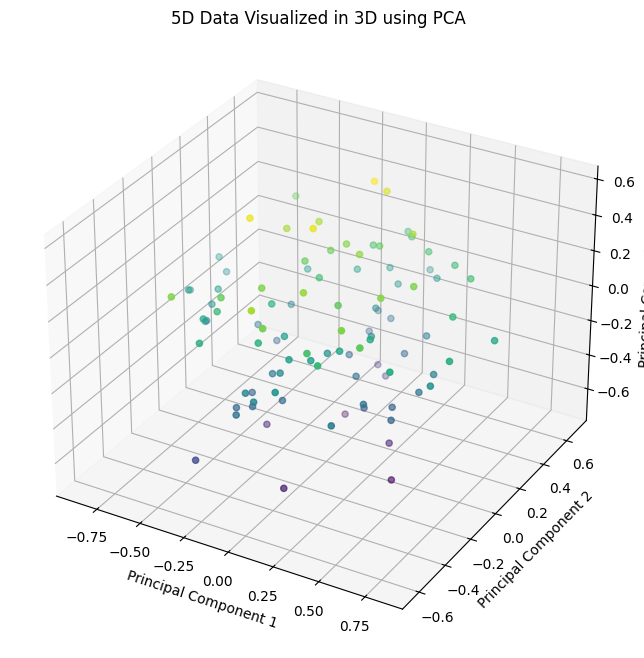

Explained Variance Ratios: [0.28857914 0.23635118 0.18619353]
